<a href="https://colab.research.google.com/github/gwyoun05/Machine-Learning/blob/main/Copy_of_ML_Week6_Seminar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train = pd.read_csv('/content/drive/MyDrive/slice_train.csv')

In [ ]:
train.shape

(42800, 362)

In [ ]:
train.head(10)

,Unnamed: 0,Y,value0,value1,value2,value3,value4,value5,value6,value7,value8,value9,value10,value11,value12,value13,value14,value15,value16,value17,value18,value19,value20,value21,value22,value23,value24,value25,value26,value27,value28,value29,value30,value31,value32,value33,value34,value35,value36,value37,...,value340,value341,value342,value344,value345,value346,value347,value348,value349,value350,value352,value353,value354,value355,value356,value357,value358,value360,value361,value362,value363,value364,value365,value366,value368,value369,value370,value371,value372,value373,value374,value375,value376,value377,value378,value379,value380,value381,value382,value383
0,1,21.803851,0.0,0.0,0.0,0.0,0.0,0.0,-0.711654,-0.855484,-0.931475,-2.497875,0.0,0.000000,0.0,2.466773,0.000000,0.0,0.0,-1.450871,-1.470995,-1.520997,0.0,0.0,0.0,3.111824,2.724715,0.0,0.0,0.0,0.0,-2.64665,0.0,0.0,0.0,2.960232,3.081696,0.000000,0.0,0.0,...,0.0,0.0,0.0,2.385242,0.0,0.0,0.0,0.0,0.0,0.0,2.507815,0.0,0.0,0.0,0.0,0.0,0.0,2.185646,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,-2.913172,2.557517,0.0,0.0,0.0,0.0,0.0,-2.531964,-2.04096
1,2,21.745726,0.0,0.0,0.0,0.0,0.0,0.0,-0.711654,-0.855484,-0.931475,-2.497875,0.0,0.000000,0.0,2.656730,0.000000,0.0,0.0,-1.450871,-1.470995,-1.520997,0.0,0.0,0.0,3.080534,2.827842,0.0,0.0,0.0,0.0,-2.64665,0.0,0.0,0.0,2.980054,3.084143,0.000000,0.0,0.0,...,0.0,0.0,0.0,2.385353,0.0,0.0,0.0,0.0,0.0,0.0,2.561440,0.0,0.0,0.0,0.0,0.0,0.0,2.431072,0.0,0.0,0.0,0.0,0.0,0.0,2.170267,0.0,0.0,0.0,0.0,0.0,0.0,-2.913172,2.548718,0.0,0.0,0.0,0.0,0.0,-2.531964,-2.04096
2,4,21.629474,0.0,0.0,0.0,0.0,0.0,0.0,-0.711654,-0.855484,-0.931475,-2.497875,0.0,0.000000,0.0,2.796371,0.000000,0.0,0.0,-1.450871,-1.470995,-1.520997,0.0,0.0,0.0,3.076230,2.753305,0.0,0.0,0.0,0.0,-2.64665,0.0,0.0,0.0,2.999968,3.064042,0.000000,0.0,0.0,...,0.0,0.0,0.0,2.380289,0.0,0.0,0.0,0.0,0.0,0.0,2.551304,0.0,0.0,0.0,0.0,0.0,0.0,2.187545,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,-2.913172,2.548718,0.0,0.0,0.0,0.0,0.0,-2.531964,-2.04096
3,5,21.571348,0.0,0.0,0.0,0.0,0.0,0.0,-0.711654,-0.855484,-0.931475,-2.497875,0.0,0.000000,0.0,2.856052,0.000000,0.0,0.0,-1.450871,-1.470995,-1.520997,0.0,0.0,0.0,3.039905,2.807541,0.0,0.0,0.0,0.0,-2.64665,0.0,0.0,0.0,3.018158,3.072433,0.000000,0.0,0.0,...,0.0,0.0,0.0,2.380101,0.0,0.0,0.0,0.0,0.0,0.0,2.551001,0.0,0.0,0.0,0.0,0.0,0.0,2.368095,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,-2.913172,2.548261,0.0,0.0,0.0,0.0,0.0,-2.531964,-2.04096
4,6,21.513223,0.0,0.0,0.0,0.0,0.0,0.0,-0.711654,-0.855484,-0.931475,-2.497875,0.0,0.000000,0.0,2.884028,0.000000,0.0,0.0,-1.450871,-1.470995,-1.520997,0.0,0.0,0.0,3.039905,2.788879,0.0,0.0,0.0,0.0,-2.64665,0.0,0.0,0.0,3.010539,3.066400,0.000000,0.0,0.0,...,0.0,0.0,0.0,2.375467,0.0,0.0,0.0,0.0,0.0,0.0,2.551229,0.0,0.0,0.0,0.0,0.0,0.0,2.486189,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,-2.913172,2.486615,0.0,0.0,0.0,0.0,0.0,-2.531964,-2.04096
5,7,21.455097,0.0,0.0,0.0,0.0,0.0,0.0,-0.711654,-0.855484,-0.931475,-2.497875,0.0,0.000000,0.0,2.892557,0.252833,0.0,0.0,-1.450871,-1.470995,-1.520997,0.0,0.0,0.0,3.003527,2.883328,0.0,0.0,0.0,0.0,-2.64665,0.0,0.0,0.0,3.002508,3.084208,0.000000,0.0,0.0,...,0.0,0.0,0.0,2.358558,0.0,0.0,0.0,0.0,0.0,0.0,2.539931,0.0,0.0,0.0,0.0,0.0,0.0,2.511613,0.0,0.0,0.0,0.0,0.0,0.0,2.341279,0.0,0.0,0.0,0.0,0.0,0.0,-2.913172,0.000000,0.0,0.0,0.0,0.0,0.0,-2.531964,-2.04096
6,8,21.396971,0.0,0.0,0.0,0.0,0.0,0.0,-0.711654,-0.855484,-0.931475,-2.497875,0.0,0.000000,0.0,2.926796,0.646298,0.0,0.0,-1.450871,-1.470995,-1.520997,0.0,0.0,0.0,3.000150,2.896563,0.0,0.0,0.0,0.0,-2.64665,0.0,0.0,0.0,3.006577,3.085439,0.000000,0.0,0.0,...,0.0,0.0,0.0,2.351479,0.0,0.0,0.0,0.0,0.0,0.0,2.521813,0.0,0.0,0.0,0.0,0.0,0.0,2.511613,0.0,0.0,0.0,0.0,0.0,0.0,2.405612,0.0,0.0,0.0,0.0,0.0,0.0,-2.913172,2.263232,0.0,0.0,0.0,0.0,0.0,-2.531964,-2.04096
7,9,21.280720,0.0,0.0,0.0,0.0,0.0,0.0,-0.711654,-0.855484,-0.931475,-2.497875,0.0,0.000000,0.0,2.979446,0.000000,0.

In [ ]:
train = train.iloc[:,1:]

In [ ]:
train.head(20)

,Y,value0,value1,value2,value3,value4,value5,value6,value7,value8,value9,value10,value11,value12,value13,value14,value15,value16,value17,value18,value19,value20,value21,value22,value23,value24,value25,value26,value27,value28,value29,value30,value31,value32,value33,value34,value35,value36,value37,value40,...,value340,value341,value342,value344,value345,value346,value347,value348,value349,value350,value352,value353,value354,value355,value356,value357,value358,value360,value361,value362,value363,value364,value365,value366,value368,value369,value370,value371,value372,value373,value374,value375,value376,value377,value378,value379,value380,value381,value382,value383
0,21.803851,0.0,0.0,0.0,0.0,0.0,0.0,-0.711654,-0.855484,-0.931475,-2.497875,0.0,0.000000,0.000000,2.466773,0.000000,0.0,0.0,-1.450871,-1.470995,-1.520997,0.000000,0.000000,0.000000,3.111824,2.724715,0.000000,0.000000,0.0,0.0,-2.64665,0.00000,0.000000,0.000000,2.960232,3.081696,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.000000,2.385242,0.0,0.0,0.0,0.0,0.000000,0.000000,2.507815,0.0,0.0,0.0,0.0,0.0,0.000000,2.185646,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,-2.913172,2.557517,0.0,0.0,0.0,0.0,0.0,-2.531964,-2.04096
1,21.745726,0.0,0.0,0.0,0.0,0.0,0.0,-0.711654,-0.855484,-0.931475,-2.497875,0.0,0.000000,0.000000,2.656730,0.000000,0.0,0.0,-1.450871,-1.470995,-1.520997,0.000000,0.000000,0.000000,3.080534,2.827842,0.000000,0.000000,0.0,0.0,-2.64665,0.00000,0.000000,0.000000,2.980054,3.084143,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.000000,2.385353,0.0,0.0,0.0,0.0,0.000000,0.000000,2.561440,0.0,0.0,0.0,0.0,0.0,0.000000,2.431072,0.0,0.0,0.0,0.0,0.0,0.0,2.170267,0.0,0.0,0.0,0.0,0.0,0.0,-2.913172,2.548718,0.0,0.0,0.0,0.0,0.0,-2.531964,-2.04096
2,21.629474,0.0,0.0,0.0,0.0,0.0,0.0,-0.711654,-0.855484,-0.931475,-2.497875,0.0,0.000000,0.000000,2.796371,0.000000,0.0,0.0,-1.450871,-1.470995,-1.520997,0.000000,0.000000,0.000000,3.076230,2.753305,0.000000,0.000000,0.0,0.0,-2.64665,0.00000,0.000000,0.000000,2.999968,3.064042,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.000000,2.380289,0.0,0.0,0.0,0.0,0.000000,0.000000,2.551304,0.0,0.0,0.0,0.0,0.0,0.000000,2.187545,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,-2.913172,2.548718,0.0,0.0,0.0,0.0,0.0,-2.531964,-2.04096
3,21.571348,0.0,0.0,0.0,0.0,0.0,0.0,-0.711654,-0.855484,-0.931475,-2.497875,0.0,0.000000,0.000000,2.856052,0.000000,0.0,0.0,-1.450871,-1.470995,-1.520997,0.000000,0.000000,0.000000,3.039905,2.807541,0.000000,0.000000,0.0,0.0,-2.64665,0.00000,0.000000,0.000000,3.018158,3.072433,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.000000,2.380101,0.0,0.0,0.0,0.0,0.000000,0.000000,2.551001,0.0,0.0,0.0,0.0,0.0,0.000000,2.368095,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,-2.913172,2.548261,0.0,0.0,0.0,0.0,0.0,-2.531964,-2.04096
4,21.513223,0.0,0.0,0.0,0.0,0.0,0.0,-0.711654,-0.855484,-0.931475,-2.497875,0.0,0.000000,0.000000,2.884028,0.000000,0.0,0.0,-1.450871,-1.470995,-1.520997,0.000000,0.000000,0.000000,3.039905,2.788879,0.000000,0.000000,0.0,0.0,-2.64665,0.00000,0.000000,0.000000,3.010539,3.066400,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.000000,2.375467,0.0,0.0,0.0,0.0,0.000000,0.000000,2.551229,0.0,0.0,0.0,0.0,0.0,0.000000,2.486189,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,-2.913172,2.486615,0.0,0.0,0.0,0.0,0.0,-2.531964,-2.04096
5,21.455097,0.0,0.0,0.0,0.0,0.0,0.0,-0.711654,-0.855484,-0.931475,-2.497875,0.0,0.000000,0.000000,2.892557,0.252833,0.0,0.0,-1.450871,-1.470995,-1.520997,0.000000,0.000000,0.000000,3.003527,2.883328,0.000000,0.000000,0.0,0.0,-2.64665,0.00000,0.000000,0.000000,3.002508,3.084208,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.000000,2.358558,0.0,0.0,0.0,0.0,0.000000,0.000000,2.539931,0.0,0.0,0.0,0.0,0.0,0.000000,2.511613,0.0,0.0,0.0,0.0,0.0,0.0,2.341279,0.0,0.0,0.0,0.0,0.0,0.0,-2.913172,0.000000,0.0,0.0,0.0,0.0,0.0,-2.531964,-2.04096
6,21.396971,0.0,0.0,0.0,0.0,0.0,0.0,-0.711654,-0.855484,-0.931475,-2.497875,0.0,0.000000,0.000000,2.926796,0.646298,0.0,0

In [ ]:
test = pd.read_csv('/content/drive/MyDrive/slice_test.csv')

In [ ]:
test.shape

(10700, 362)

In [ ]:
test.head(10)

,Unnamed: 0,Y,value0,value1,value2,value3,value4,value5,value6,value7,value8,value9,value10,value11,value12,value13,value14,value15,value16,value17,value18,value19,value20,value21,value22,value23,value24,value25,value26,value27,value28,value29,value30,value31,value32,value33,value34,value35,value36,value37,...,value340,value341,value342,value344,value345,value346,value347,value348,value349,value350,value352,value353,value354,value355,value356,value357,value358,value360,value361,value362,value363,value364,value365,value366,value368,value369,value370,value371,value372,value373,value374,value375,value376,value377,value378,value379,value380,value381,value382,value383
0,3,21.687600,0.0,0.0,0.0,0.0,0.0,0.0,-0.711654,-0.855484,-0.931475,-2.497875,0.000000,0.0,0.000000,2.756742,0.0,0.0,0.0,-1.450871,-1.470995,-1.520997,0.000000,0.000000,0.000000,3.060169,2.839223,0.000000,0.000000,0.0,0.0,-2.64665,0.000000,0.000000,0.000000,2.984701,3.080404,0.000000,0.000000,0.0,...,0.0,0.0,0.000000,2.385353,0.0,0.0,0.0,0.0,0.000000,0.000000,2.56144,0.000000,0.000000,0.000000,0.0,0.0,0.000000,2.465328,0.000000,0.000000,0.000000,0.000000,0.0,0.0,2.170267,0.00000,0.000000,0.000000,0.000000,0.0,0.0,-2.913172,2.548718,0.000000,0.000000,0.000000,0.000000,0.0,-2.531964,-2.04096
1,18,24.303259,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,-0.931475,-2.497875,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,-1.520997,0.000000,1.939254,1.565959,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.00000,0.000000,2.450845,1.863270,0.000000,3.049833,0.000000,0.000000,0.0,...,0.0,0.0,-2.578777,0.000000,0.0,0.0,0.0,0.0,-2.089921,-3.019155,0.00000,0.000000,0.000000,0.000000,0.0,0.0,-2.506513,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,-2.04096
2,21,23.489498,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,-0.931475,-2.497875,0.000000,0.0,0.000000,2.626959,0.0,0.0,0.0,0.000000,0.000000,-1.520997,0.000000,1.963690,0.000000,0.000000,0.000000,3.636813,5.158405,0.0,0.0,0.00000,0.129376,2.419607,0.000000,0.000000,0.000000,3.483650,4.968996,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,-3.019155,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,-2.04096
3,22,23.547624,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,-0.931475,-2.497875,0.000000,0.0,0.276551,2.671568,0.0,0.0,0.0,0.000000,0.000000,-1.520997,0.000000,2.309553,2.797537,0.869186,0.000000,3.665658,0.821170,0.0,0.0,0.00000,0.000000,3.009123,0.000000,0.000000,0.000000,3.530152,4.575964,0.0,...,0.0,0.0,-2.578777,0.000000,0.0,0.0,0.0,0.0,0.000000,-3.019155,0.00000,0.000000,0.000000,0.000000,0.0,0.0,-2.506513,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,-2.04096
4,27,23.954504,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,-0.931475,-2.497875,0.000000,0.0,2.093091,0.000000,0.0,0.0,0.0,0.000000,0.000000,-1.520997,0.000000,0.000000,3.172592,0.000000,2.097628,0.596269,0.000000,0.0,0.0,0.00000,0.000000,3.303524,2.516363,0.000000,3.049266,3.407360,0.000000,0.0,...,0.0,0.0,-2.578777,0.000000,0.0,0.0,0.0,0.0,0.000000,-3.019155,0.00000,0.000000,0.000000,0.000000,0.0,0.0,-2.506513,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,-2.04096
5,28,23.722001,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,-0.931475,-2.497875,0.000000,0.0,2.147460,1.465054,0.0,0.0,0.0,0.000000,0.000000,-1.520997,0.000000,0.000000,3.418569,0.420675,0.603489,3.531626,0.000000,0.0,0.0,0.00000,1.699127,3.767402,2.310095,0.000000,0.000000,3.535099,0.000000,0.0,...,0.0,0.0,-2.578777,0.000000,0.0,0.0,0.0,0.0,0.000000,-3.019

In [ ]:
test = test.iloc[:,1:]

In [ ]:
test.head(10)

,Y,value0,value1,value2,value3,value4,value5,value6,value7,value8,value9,value10,value11,value12,value13,value14,value15,value16,value17,value18,value19,value20,value21,value22,value23,value24,value25,value26,value27,value28,value29,value30,value31,value32,value33,value34,value35,value36,value37,value40,...,value340,value341,value342,value344,value345,value346,value347,value348,value349,value350,value352,value353,value354,value355,value356,value357,value358,value360,value361,value362,value363,value364,value365,value366,value368,value369,value370,value371,value372,value373,value374,value375,value376,value377,value378,value379,value380,value381,value382,value383
0,21.687600,0.0,0.0,0.0,0.0,0.0,0.0,-0.711654,-0.855484,-0.931475,-2.497875,0.000000,0.0,0.000000,2.756742,0.0,0.0,0.0,-1.450871,-1.470995,-1.520997,0.000000,0.000000,0.000000,3.060169,2.839223,0.000000,0.000000,0.0,0.0,-2.64665,0.000000,0.000000,0.000000,2.984701,3.080404,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.000000,2.385353,0.0,0.0,0.0,0.0,0.000000,0.000000,2.56144,0.000000,0.000000,0.000000,0.0,0.0,0.000000,2.465328,0.000000,0.000000,0.000000,0.000000,0.0,0.0,2.170267,0.00000,0.000000,0.000000,0.000000,0.0,0.0,-2.913172,2.548718,0.000000,0.000000,0.000000,0.000000,0.0,-2.531964,-2.04096
1,24.303259,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,-0.931475,-2.497875,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,-1.520997,0.000000,1.939254,1.565959,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.00000,0.000000,2.450845,1.863270,0.000000,3.049833,0.000000,0.000000,0.0,0.315990,...,0.0,0.0,-2.578777,0.000000,0.0,0.0,0.0,0.0,-2.089921,-3.019155,0.00000,0.000000,0.000000,0.000000,0.0,0.0,-2.506513,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,-2.04096
2,23.489498,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,-0.931475,-2.497875,0.000000,0.0,0.000000,2.626959,0.0,0.0,0.0,0.000000,0.000000,-1.520997,0.000000,1.963690,0.000000,0.000000,0.000000,3.636813,5.158405,0.0,0.0,0.00000,0.129376,2.419607,0.000000,0.000000,0.000000,3.483650,4.968996,0.0,0.000000,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,-3.019155,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,-2.04096
3,23.547624,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,-0.931475,-2.497875,0.000000,0.0,0.276551,2.671568,0.0,0.0,0.0,0.000000,0.000000,-1.520997,0.000000,2.309553,2.797537,0.869186,0.000000,3.665658,0.821170,0.0,0.0,0.00000,0.000000,3.009123,0.000000,0.000000,0.000000,3.530152,4.575964,0.0,0.000000,...,0.0,0.0,-2.578777,0.000000,0.0,0.0,0.0,0.0,0.000000,-3.019155,0.00000,0.000000,0.000000,0.000000,0.0,0.0,-2.506513,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,-2.04096
4,23.954504,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,-0.931475,-2.497875,0.000000,0.0,2.093091,0.000000,0.0,0.0,0.0,0.000000,0.000000,-1.520997,0.000000,0.000000,3.172592,0.000000,2.097628,0.596269,0.000000,0.0,0.0,0.00000,0.000000,3.303524,2.516363,0.000000,3.049266,3.407360,0.000000,0.0,2.355746,...,0.0,0.0,-2.578777,0.000000,0.0,0.0,0.0,0.0,0.000000,-3.019155,0.00000,0.000000,0.000000,0.000000,0.0,0.0,-2.506513,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,-2.04096
5,23.722001,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,-0.931475,-2.497875,0.000000,0.0,2.147460,1.465054,0.0,0.0,0.0,0.000000,0.000000,-1.520997,0.000000,0.000000,3.418569,0.420675,0.603489,3.531626,0.000000,0.0,0.0,0.00000,1.699127,3.767402,2.310095,0.000000,0.000000,3.535099,0.000000,0.0,0.000000,...,0.0,0.0,-2.578777,0.0000

In [ ]:
X_train = train.iloc[:,1:]

In [ ]:
X_train.head(10)

,value0,value1,value2,value3,value4,value5,value6,value7,value8,value9,value10,value11,value12,value13,value14,value15,value16,value17,value18,value19,value20,value21,value22,value23,value24,value25,value26,value27,value28,value29,value30,value31,value32,value33,value34,value35,value36,value37,value40,value41,...,value340,value341,value342,value344,value345,value346,value347,value348,value349,value350,value352,value353,value354,value355,value356,value357,value358,value360,value361,value362,value363,value364,value365,value366,value368,value369,value370,value371,value372,value373,value374,value375,value376,value377,value378,value379,value380,value381,value382,value383
0,0.0,0.0,0.0,0.0,0.0,0.0,-0.711654,-0.855484,-0.931475,-2.497875,0.0,0.000000,0.0,2.466773,0.000000,0.0,0.0,-1.450871,-1.470995,-1.520997,0.0,0.0,0.0,3.111824,2.724715,0.0,0.0,0.0,0.0,-2.64665,0.0,0.0,0.0,2.960232,3.081696,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.385242,0.0,0.0,0.0,0.0,0.0,0.0,2.507815,0.0,0.0,0.0,0.0,0.0,0.0,2.185646,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,-2.913172,2.557517,0.0,0.0,0.0,0.0,0.0,-2.531964,-2.04096
1,0.0,0.0,0.0,0.0,0.0,0.0,-0.711654,-0.855484,-0.931475,-2.497875,0.0,0.000000,0.0,2.656730,0.000000,0.0,0.0,-1.450871,-1.470995,-1.520997,0.0,0.0,0.0,3.080534,2.827842,0.0,0.0,0.0,0.0,-2.64665,0.0,0.0,0.0,2.980054,3.084143,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.385353,0.0,0.0,0.0,0.0,0.0,0.0,2.561440,0.0,0.0,0.0,0.0,0.0,0.0,2.431072,0.0,0.0,0.0,0.0,0.0,0.0,2.170267,0.0,0.0,0.0,0.0,0.0,0.0,-2.913172,2.548718,0.0,0.0,0.0,0.0,0.0,-2.531964,-2.04096
2,0.0,0.0,0.0,0.0,0.0,0.0,-0.711654,-0.855484,-0.931475,-2.497875,0.0,0.000000,0.0,2.796371,0.000000,0.0,0.0,-1.450871,-1.470995,-1.520997,0.0,0.0,0.0,3.076230,2.753305,0.0,0.0,0.0,0.0,-2.64665,0.0,0.0,0.0,2.999968,3.064042,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.380289,0.0,0.0,0.0,0.0,0.0,0.0,2.551304,0.0,0.0,0.0,0.0,0.0,0.0,2.187545,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,-2.913172,2.548718,0.0,0.0,0.0,0.0,0.0,-2.531964,-2.04096
3,0.0,0.0,0.0,0.0,0.0,0.0,-0.711654,-0.855484,-0.931475,-2.497875,0.0,0.000000,0.0,2.856052,0.000000,0.0,0.0,-1.450871,-1.470995,-1.520997,0.0,0.0,0.0,3.039905,2.807541,0.0,0.0,0.0,0.0,-2.64665,0.0,0.0,0.0,3.018158,3.072433,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.380101,0.0,0.0,0.0,0.0,0.0,0.0,2.551001,0.0,0.0,0.0,0.0,0.0,0.0,2.368095,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,-2.913172,2.548261,0.0,0.0,0.0,0.0,0.0,-2.531964,-2.04096
4,0.0,0.0,0.0,0.0,0.0,0.0,-0.711654,-0.855484,-0.931475,-2.497875,0.0,0.000000,0.0,2.884028,0.000000,0.0,0.0,-1.450871,-1.470995,-1.520997,0.0,0.0,0.0,3.039905,2.788879,0.0,0.0,0.0,0.0,-2.64665,0.0,0.0,0.0,3.010539,3.066400,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.375467,0.0,0.0,0.0,0.0,0.0,0.0,2.551229,0.0,0.0,0.0,0.0,0.0,0.0,2.486189,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,-2.913172,2.486615,0.0,0.0,0.0,0.0,0.0,-2.531964,-2.04096
5,0.0,0.0,0.0,0.0,0.0,0.0,-0.711654,-0.855484,-0.931475,-2.497875,0.0,0.000000,0.0,2.892557,0.252833,0.0,0.0,-1.450871,-1.470995,-1.520997,0.0,0.0,0.0,3.003527,2.883328,0.0,0.0,0.0,0.0,-2.64665,0.0,0.0,0.0,3.002508,3.084208,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.358558,0.0,0.0,0.0,0.0,0.0,0.0,2.539931,0.0,0.0,0.0,0.0,0.0,0.0,2.511613,0.0,0.0,0.0,0.0,0.0,0.0,2.341279,0.0,0.0,0.0,0.0,0.0,0.0,-2.913172,0.000000,0.0,0.0,0.0,0.0,0.0,-2.531964,-2.04096
6,0.0,0.0,0.0,0.0,0.0,0.0,-0.711654,-0.855484,-0.931475,-2.497875,0.0,0.000000,0.0,2.926796,0.646298,0.0,0.0,-1.450871,-1.470995,-1.520997,0.0,0.0,0.0,3.000150,2.896563,0.0,0.0,0.0,0.0,-2.64665,0.0,0.0,0.0,3.006577,3.085439,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.351479,0.0,0.0,0.0,0.0,0.0,0.0,2.521813,0.0,0.0,0.0,0.0,0.0,0.0,2.511613,0.0,0.0,0.0,0.0,0.0,0.0,2.405612,0.0,0.0,0.0,0.0,0.0,0.0,-2.913172,2.263232,0.0,0.0,0.0,0.0,0.0,-2.531964,-2.04096
7,0.0,0.0,0.0,0.0,0.0,0.0,-0.711654,-0.855484,-0.931475,-2.497875,0.0,0.000000,0.0,2.979446,0.000000,0.0,0.0,-1.450871,-1.470995,-1.520997,0

In [ ]:
y_train = train['Y'].values

In [ ]:
y_train

array([21.803851, 21.745726, 21.629474, ..., 27.861679, 29.290398,
       27.945721])

In [ ]:
X_test = test.iloc[:,1:]

In [ ]:
y_test = test['Y'].values

In [ ]:
y_test

array([21.6876  , 24.303259, 23.489498, ..., 27.945721, 14.582997,
       14.498955])

In [ ]:
X_train.shape

(42800, 360)

In [ ]:
y_train.shape

(42800,)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [ ]:
scaler = StandardScaler()

In [ ]:
X_train = scaler.fit_transform(X_train)

In [ ]:
X_test = scaler.transform(X_test)

In [ ]:
model = Sequential([Dense(64,input_dim=360,activation='relu'),
                    BatchNormalization(),
                    Dense(32,activation='relu'),
                    BatchNormalization(),
                    Dense(16,activation='relu'),
                    BatchNormalization(),
                    Dense(1,activation='relu')
                    ])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                23104     
_________________________________________________________________
batch_normalization (BatchNo (None, 64)                256       
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32)                128       
_________________________________________________________________
dense_2 (Dense)              (None, 16)                528       
_________________________________________________________________
batch_normalization_2 (Batch (None, 16)                64        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 1

In [ ]:
from keras.optimizers import SGD

opt = SGD(lr=0.0005)

model.compile(optimizer=opt,loss='mse',metrics=RootMeanSquaredError())

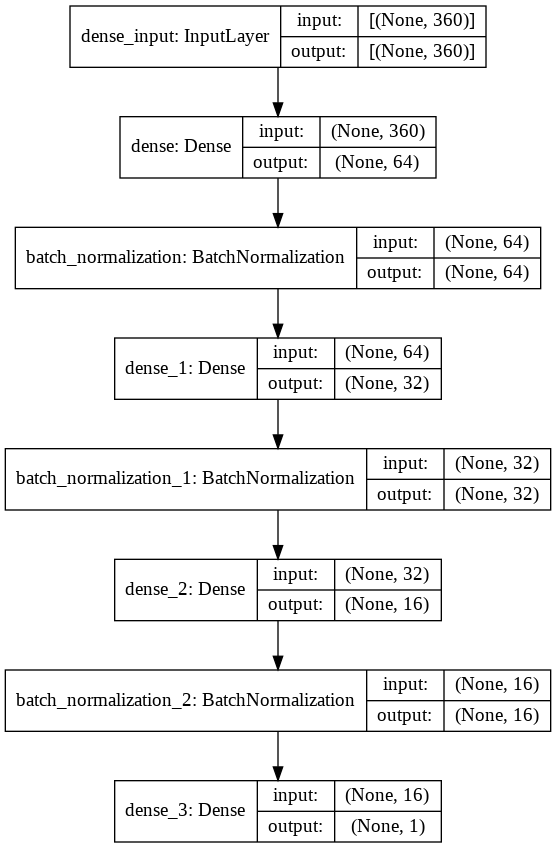

In [ ]:
plot_model(model,show_shapes=True)

In [ ]:
chp = ModelCheckpoint('/content/drive/MyDrive/best_mod.h5',save_best_only=True,verbose=1)

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss',patience=5)

In [ ]:
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=50,callbacks=[early_stopping,chp],verbose=1,batch_size=128)

Epoch 1/50
335/335 [==============================] - 2s 4ms/step - loss: 5.2572 - root_mean_squared_error: 2.2898 - val_loss: 0.8817 - val_root_mean_squared_error: 0.9390

Epoch 00001: val_loss improved from inf to 0.88167, saving model to /content/drive/MyDrive/best_mod.h5
Epoch 2/50
335/335 [==============================] - 1s 3ms/step - loss: 4.9499 - root_mean_squared_error: 2.2221 - val_loss: 0.8713 - val_root_mean_squared_error: 0.9334

Epoch 00002: val_loss improved from 0.88167 to 0.87126, saving model to /content/drive/MyDrive/best_mod.h5
Epoch 3/50
335/335 [==============================] - 1s 3ms/step - loss: 4.8571 - root_mean_squared_error: 2.2009 - val_loss: 0.6789 - val_root_mean_squared_error: 0.8240

Epoch 00003: val_loss improved from 0.87126 to 0.67892, saving model to /content/drive/MyDrive/best_mod.h5
Epoch 4/50
335/335 [==============================] - 1s 3ms/step - loss: 4.3925 - root_mean_squared_error: 2.0918 - val_loss: 0.6083 - val_root_mean_squared_error:

In [ ]:
print(history.history.keys())

dict_keys(['loss', 'root_mean_squared_error', 'val_loss', 'val_root_mean_squared_error'])


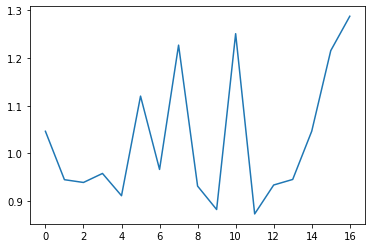

In [ ]:
plt.plot(history.history['val_root_mean_squared_error'])

In [ ]:
model.evaluate(X_test,y_test,verbose=1)

335/335 [==============================] - 1s 2ms/step - loss: 1.6584 - root_mean_squared_error: 1.2878


[1.6583901643753052, 1.2877849340438843]